# Predicting Stock Clossing Price Using News Headlines as Predictors

This notebook explores the effect (if any) that news headlines have on forecasting stock market closing prices. I'll be using data from [this Kaggle competition](https://www.kaggle.com/aaron7sun/stocknews) and Apple stock data.

## Import and Process News Headlines

The data was already downloaded to the `data` directory, so here we import it and show a few lines.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
news_df = pd.read_csv('../data/Combined_News_DJIA.csv').drop(labels='Label', axis=1)
news_df.head(3)

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


### Remove leading `b`

Some headlines were stored as bytes (preceded by a `b` but needed to be converted to strings. I tried [this solution](https://stackoverflow.com/questions/41918836/how-do-i-get-rid-of-the-b-prefix-in-a-string-in-python) but it didn't work, so I just created a function the removed the unnecessary characters. 

In [3]:
def byte_to_str(value):
    if isinstance(value, str) and (value.startswith("b'") or value.startswith('b"')):
        value = value[2:-1]
    return value

for column in news_df.iloc[:, 1:].columns:
    news_df[column] = news_df[column].apply(byte_to_str)
    
news_df.head(3)

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,Georgian troops retreat from S. Osettain capit...,...,Georgia Invades South Ossetia - if Russia gets...,Al-Qaeda Faces Islamist Backlash,"Condoleezza Rice: ""The US would not act to pre...",This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge
1,2008-08-11,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict,Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks 'faked',What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,Welcome To World War IV! Now In High Definition!,...,Israel and the US behind the Georgian aggression?,"""Do not believe TV, neither Russian nor Georgi...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer,War in South Ossetia [PICS],Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war,So this is what it's come to: trading sex for ...
2,2008-08-12,Remember that adorable 9-year-old who sang at ...,Russia 'ends Georgia operation',"""If we had no sexual harassment we would have ...",Al-Qa'eda is losing support in Iraq because of...,Ceasefire in Georgia: Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,I'm Trying to Get a Sense of This Whole Georgi...,The US military was surprised by the timing an...,...,U.S. troops still in Georgia (did you know the...,Why Russias response to Georgia was right,"Gorbachev accuses U.S. of making a ""serious bl...","Russia, Georgia, and NATO: Cold War Two",Remember that adorable 62-year-old who led you...,War in Georgia: The Israeli connection,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?,BBC NEWS | Asia-Pacific | Extinction 'by man n...


## Create Latent Space Representation

In order to train a model that takes news headlines as predictors/features, we first have to convert the headlines to a numerical representation that contains syntactic and semantic information about the headlines. For that, we use [BERT](https://arxiv.org/abs/1810.04805), which is a transformer model pre-trained with all of Wikipedia and a large dataset of unpublished books. BERT produces a [latent state representation](https://towardsdatascience.com/understanding-latent-space-in-machine-learning-de5a7c687d8d) for each headline in the form of matrix where each row represents a word in a healine. The matrix is then transformed to a vector by calculating the mean of each column. Then, all the vector representations for all headlines of a given day are used to create a new matrix, which represents all articles for that day. This matrix is also transformed to a vector by calculating the mean of each column. The collection of vectors is then used as features to train the final model.

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import torch
from transformers import BertConfig, BertModel, BertTokenizer
import numpy as np

model_name = "bert-base-cased"
device = "cuda:0" if torch.cuda.is_available() else "cpu"

config = BertConfig.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name, config=config)
bert_model.eval()
bert_tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jneyr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
articles_matrix = np.empty((len(news_df.index), 768))

with torch.no_grad():
    for row in news_df.iterrows():
        day_index = row[0]
        headlines_series = row[1][1:]
        nan_count = headlines_series.isna().sum()
        day_article_matrix = np.empty((headlines_series.size - nan_count, 768))
        for index, headline in enumerate(headlines_series):
            if isinstance(headline, str):
                tokens = bert_tokenizer(headline, return_tensors='pt')
                bert_model.to(device)
                output = bert_model(tokens.input_ids)
                # outputs matrix of shape (num_tokens, 768)
                latent_matrix = output.last_hidden_state.to('cpu').detach().numpy()[0]
                mean_vector = np.mean(latent_matrix, axis=0).reshape((1, latent_matrix.shape[1]))
                day_article_matrix[index, :] = mean_vector
                
        mean_vector = np.mean(day_article_matrix, axis=0).reshape((1, day_article_matrix.shape[1]))
        articles_matrix[day_index, :] = mean_vector

(1, 768)
[[ 1.61242918e-01 -4.41513467e-02 -1.22317728e-01  5.99045403e-02
   8.78523793e-02 -8.36437346e-02  5.91977447e-02  2.44660926e-01
   2.43423217e-02 -5.40148347e-02  1.86282261e-01  4.29611329e-01
  -2.26619737e-01  1.28016217e-01 -2.49101269e-01 -6.07003271e-02
  -2.92187694e-02 -2.78357719e-02 -2.65830918e-02  9.13562427e-02
  -9.37428011e-02 -2.02062556e-01 -1.51595617e-01 -2.19386039e-02
   4.79783345e-02 -2.60563515e-01 -1.90701695e-01  5.31375051e-01
   2.23152091e-02  2.01494830e-01  1.10710533e-01  1.71262884e-02
   8.22881886e-02  1.51584423e-01 -6.32127832e-03 -2.25669242e-02
   9.82379672e-02  2.27534334e-01 -4.75026301e-02  9.37955222e-02
   9.57907159e-02 -3.67457618e-02 -3.58739542e-02  2.20479078e-01
   1.79389917e-01 -1.99185429e-01  7.84233266e-02  2.11309971e-02
  -2.75252224e-01  2.15787314e-02  2.96550461e-01 -1.07217005e-01
   1.01135924e-01  2.34949933e-02  1.17435885e-01 -2.84969444e-01
  -4.41703508e-02 -3.81892538e-02 -1.12953080e-01  2.17627681e-01
 

In [6]:
print(articles_matrix.shape)

(1989, 768)


In [8]:
news_df['Date'] = pd.to_datetime(news_df['Date'], format='%Y-%m-%d')

In [22]:
news_numerical_df = pd.DataFrame(articles_matrix, index=news_df['Date'])
news_numerical_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0.210851,-0.090956,-0.133738,0.047273,0.069745,-0.101345,0.154699,0.254861,0.066159,-0.111115,...,-0.077575,0.155545,-0.256928,-0.167264,0.010961,0.206717,-0.040495,0.211340,-0.071277,-0.049920
2008-08-11,0.159779,-0.024872,-0.073777,0.077551,0.099796,-0.180525,0.221916,0.219815,0.018968,-0.087949,...,-0.049978,0.166972,-0.250449,-0.191972,-0.006441,0.200344,-0.040223,0.180535,-0.069198,-0.015436
2008-08-12,0.213139,-0.099026,-0.116366,-0.007451,0.082543,-0.082354,0.261837,0.236843,0.063086,-0.121018,...,0.006448,0.179479,-0.258953,-0.191989,0.007443,0.153227,-0.045795,0.144721,-0.068279,-0.065761
2008-08-13,0.201003,-0.160873,-0.175543,0.007270,0.040910,-0.090587,0.168907,0.309206,0.030571,-0.108280,...,-0.024517,0.173006,-0.240295,-0.238002,0.001308,0.222144,-0.095004,0.131802,-0.090176,-0.083551
2008-08-14,0.164933,-0.124523,-0.183414,-0.003769,0.056450,-0.121343,0.154771,0.273552,0.098144,-0.056272,...,-0.031923,0.130638,-0.216515,-0.163983,-0.061374,0.223180,-0.104918,0.132047,-0.034126,-0.024200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,0.139724,-0.026193,-0.078541,0.006115,0.072882,-0.121047,0.103478,0.206647,0.047915,-0.125943,...,-0.046161,0.091145,-0.265655,-0.194452,-0.079270,0.112276,-0.068247,0.165455,0.033275,0.019140
2016-06-28,0.195052,-0.014232,-0.121102,0.036027,0.024558,-0.099874,0.127978,0.256850,0.057762,-0.106660,...,-0.067443,0.100604,-0.272524,-0.167951,-0.050773,0.047020,-0.039607,0.131884,0.074348,0.024567
2016-06-29,0.180153,0.002108,-0.124406,0.112675,0.048582,-0.122621,0.083868,0.204427,0.022933,-0.149939,...,-0.026740,0.125816,-0.170351,-0.127746,-0.071142,0.047822,-0.051191,0.130116,0.049379,-0.036861


## Stock Data

The Apple stock data is downloaded using the [Yahoo Finance Package](https://pypi.org/project/yfinance/)

In [68]:
import yfinance as yf
import datetime

tickers = ['AAPL']
start = datetime.datetime(2008,8,8)
end = datetime.datetime(2016,7,1)
stock_df = yf.download(tickers, start=start,end = end, interval='1d')
stock_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-08-08,5.852143,6.058929,5.848214,6.055357,5.199230,713997200
2008-08-11,6.073929,6.303571,6.059643,6.198571,5.322194,891304400
2008-08-12,6.197143,6.403214,6.196786,6.311786,5.419403,836278800
2008-08-13,6.356429,6.428571,6.282143,6.403571,5.498210,842346400
2008-08-14,6.368929,6.444643,6.351429,6.404286,5.498826,711300800
...,...,...,...,...,...,...
2016-06-24,23.227501,23.665001,23.162500,23.350000,21.780588,301245600
2016-06-27,23.250000,23.262501,22.875000,23.010000,21.463432,181958400
2016-06-28,23.225000,23.415001,23.035000,23.397499,21.824892,161779600


### Data Description

We will use the daily stock data for Apple, encompasing the dates of 08/08/2008 - 07/01/2016. We can see below that the data is not stationary, but the deep learning architecture that we will be using to model the data (LSTM) is able to "learn non-linear and non-stationary nature of time series" [4](#References), so we don't have to make the data stationary.

count    1988.000000
mean       16.720844
std         8.410058
min         2.792857
25%         9.318839
50%        16.306428
75%        23.685357
max        33.250000
Name: Close, dtype: float64


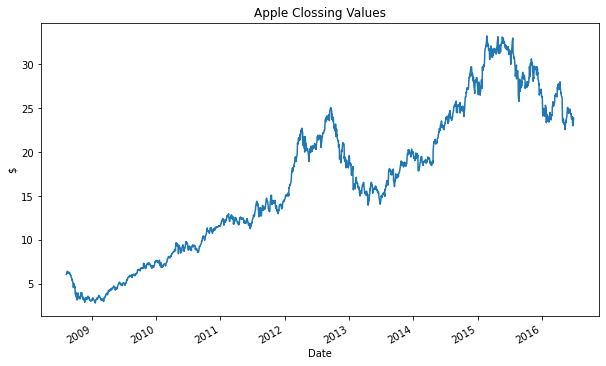

In [266]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Apple Clossing Values')
plt.ylabel('$')
print(stock_df['Close'].describe())
stock_df['Close'].plot()
plt.savefig('../plots/AAPL_20080808-20160701.png', dpi=300)
plt.show()

## Data Pre-Processing

### Scaling

[Scaling the input data can reduce the complexity of the problem being solved by the deep learning algorithm](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/), so it is a recommended step to try to reduce the scale of the predictors in order to improve the performance of the model. In this case, since the data from the BERT model is in a scale from -1 to 1, then we will scale the closing value of the stock to match that. And then we'll create a new dataset that includes the output from BERT model and the stock closing data.

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(stock_df['Close'].dropna().values.reshape(-1, 1))
stock_df['Close_Normalized'] = scaler.transform(stock_df['Close'].values.reshape(-1, 1))

data_df = news_numerical_df.copy()
data_df = data_df.join(stock_df[['Close_Normalized', 'Close']])
data_df = data_df.dropna()
data_df

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,Close_Normalized,Close
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0.210851,-0.090956,-0.133738,0.047273,0.069745,-0.101345,0.154699,0.254861,0.066159,-0.111115,...,-0.256928,-0.167264,0.010961,0.206717,-0.040495,0.211340,-0.071277,-0.049920,-0.785765,6.055357
2008-08-11,0.159779,-0.024872,-0.073777,0.077551,0.099796,-0.180525,0.221916,0.219815,0.018968,-0.087949,...,-0.250449,-0.191972,-0.006441,0.200344,-0.040223,0.180535,-0.069198,-0.015436,-0.776360,6.198571
2008-08-12,0.213139,-0.099026,-0.116366,-0.007451,0.082543,-0.082354,0.261837,0.236843,0.063086,-0.121018,...,-0.258953,-0.191989,0.007443,0.153227,-0.045795,0.144721,-0.068279,-0.065761,-0.768926,6.311786
2008-08-13,0.201003,-0.160873,-0.175543,0.007270,0.040910,-0.090587,0.168907,0.309206,0.030571,-0.108280,...,-0.240295,-0.238002,0.001308,0.222144,-0.095004,0.131802,-0.090176,-0.083551,-0.762899,6.403571
2008-08-14,0.164933,-0.124523,-0.183414,-0.003769,0.056450,-0.121343,0.154771,0.273552,0.098144,-0.056272,...,-0.216515,-0.163983,-0.061374,0.223180,-0.104918,0.132047,-0.034126,-0.024200,-0.762852,6.404286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-24,0.106202,-0.021893,-0.086349,0.048801,0.040404,-0.079268,0.155104,0.185757,0.013696,-0.126923,...,-0.261445,-0.204990,-0.106386,0.039403,-0.057979,0.196345,0.011778,0.095355,0.349906,23.350000
2016-06-27,0.139724,-0.026193,-0.078541,0.006115,0.072882,-0.121047,0.103478,0.206647,0.047915,-0.125943,...,-0.265655,-0.194452,-0.079270,0.112276,-0.068247,0.165455,0.033275,0.019140,0.327580,23.010000
2016-06-28,0.195052,-0.014232,-0.121102,0.036027,0.024558,-0.099874,0.127978,0.256850,0.057762,-0.106660,...,-0.272524,-0.167951,-0.050773,0.047020,-0.039607,0.131884,0.074348,0.024567,0.353025,23.397499


### Shifting Closing Value

Since we're training the model to predict the closing value of the Apple stock for any given day, taking the previous day's news headlines and the previous day's closing value, then we need to create a label column with the closing value from `T + 1`.

We also remove the last row since the last series of news and closing value doesn't have a value for the following day. 

In [73]:
Y = np.empty((len(data_df.index),))
Y[0:-1] = data_df['Close'].values[1:]
data_df['Label'] = Y
data_df = data_df[:-1]
data_df

,0,1,2,3,4,5,6,7,8,9,...,761,762,763,764,765,766,767,Close_Normalized,Close,Label
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0.210851,-0.090956,-0.133738,0.047273,0.069745,-0.101345,0.154699,0.254861,0.066159,-0.111115,...,-0.167264,0.010961,0.206717,-0.040495,0.211340,-0.071277,-0.049920,-0.785765,6.055357,6.198571
2008-08-11,0.159779,-0.024872,-0.073777,0.077551,0.099796,-0.180525,0.221916,0.219815,0.018968,-0.087949,...,-0.191972,-0.006441,0.200344,-0.040223,0.180535,-0.069198,-0.015436,-0.776360,6.198571,6.311786
2008-08-12,0.213139,-0.099026,-0.116366,-0.007451,0.082543,-0.082354,0.261837,0.236843,0.063086,-0.121018,...,-0.191989,0.007443,0.153227,-0.045795,0.144721,-0.068279,-0.065761,-0.768926,6.311786,6.403571
2008-08-13,0.201003,-0.160873,-0.175543,0.007270,0.040910,-0.090587,0.168907,0.309206,0.030571,-0.108280,...,-0.238002,0.001308,0.222144,-0.095004,0.131802,-0.090176,-0.083551,-0.762899,6.403571,6.404286
2008-08-14,0.164933,-0.124523,-0.183414,-0.003769,0.056450,-0.121343,0.154771,0.273552,0.098144,-0.056272,...,-0.163983,-0.061374,0.223180,-0.104918,0.132047,-0.034126,-0.024200,-0.762852,6.404286,6.276429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-23,0.196729,-0.068154,-0.124504,0.094392,0.043698,-0.053623,0.056053,0.209035,0.022804,-0.160093,...,-0.162002,-0.026221,0.116569,-0.009926,0.112204,0.108543,-0.005211,0.394231,24.025000,23.350000
2016-06-24,0.106202,-0.021893,-0.086349,0.048801,0.040404,-0.079268,0.155104,0.185757,0.013696,-0.126923,...,-0.204990,-0.106386,0.039403,-0.057979,0.196345,0.011778,0.095355,0.349906,23.350000,23.010000
2016-06-27,0.139724,-0.026193,-0.078541,0.006115,0.072882,-0.121047,0.103478,0.206647,0.047915,-0.125943,...,-0.194452,-0.079270,0.112276,-0.068247,0.165455,0.033275,0.019140,0.327580,23.010000,23.397499


### Data Split

The data is split in ~ 70% to train the model, ~ 15% to validate the model, and ~ 15% to test the model.

In [110]:
num_train_items = round(len(data_df.index) * .7)
num_val_items = (len(data_df.index) - num_train_items) // 2
num_test_items = len(data_df.index) - num_train_items - num_val_items
print(num_train_items)
print(num_val_items)
print(num_test_items)
X_train = data_df.iloc[:num_train_items,:769].values
y_train = data_df.iloc[:num_train_items,-1].values
print(X_train.shape)
print(y_train.shape)

1391
298
298
(1391, 769)
(1391,)


In [111]:
X_val = data_df.iloc[num_train_items:(num_train_items+num_val_items),:769].values
y_val = data_df.iloc[num_train_items:(num_train_items+num_val_items),-1].values
print(X_val.shape)
print(y_val.shape)

(298, 769)
(298,)


In [112]:
X_test = data_df.iloc[(num_train_items+num_val_items):,:769].values
y_test = data_df.iloc[(num_train_items+num_val_items):,-1].values
print(X_test.shape)
print(y_test.shape)

(298, 769)
(298,)


In [113]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1391, 1, 769)
(298, 1, 769)
(298, 1, 769)


## Model Training

We loosely follow [this tutorial](https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/) to train the Long Short Term Memory (LSTM) model. After trying a few different values for the output dimmesion of the LSTM layer, 1700 was the one the provided the best accuracy.

In [208]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(1700, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(X_train, y_train, epochs=100, batch_size=72, validation_data=(X_val, y_val), verbose=2, shuffle=False)

Epoch 1/100
20/20 - 3s - loss: 2.4849 - val_loss: 4.6264
Epoch 2/100
20/20 - 2s - loss: 8.8520 - val_loss: 14.3589
Epoch 3/100
20/20 - 2s - loss: 5.2638 - val_loss: 10.2710
Epoch 4/100
20/20 - 2s - loss: 6.4141 - val_loss: 10.9076
Epoch 5/100
20/20 - 2s - loss: 6.0652 - val_loss: 11.8424
Epoch 6/100
20/20 - 2s - loss: 5.3856 - val_loss: 10.6545
Epoch 7/100
20/20 - 2s - loss: 5.7609 - val_loss: 11.0129
Epoch 8/100
20/20 - 2s - loss: 5.4284 - val_loss: 10.8262
Epoch 9/100
20/20 - 2s - loss: 5.3332 - val_loss: 10.5421
Epoch 10/100
20/20 - 2s - loss: 5.2558 - val_loss: 10.2976
Epoch 11/100
20/20 - 2s - loss: 5.1756 - val_loss: 10.0783
Epoch 12/100
20/20 - 2s - loss: 5.0499 - val_loss: 9.7025
Epoch 13/100
20/20 - 2s - loss: 5.0142 - val_loss: 9.5289
Epoch 14/100
20/20 - 2s - loss: 4.8350 - val_loss: 9.0595
Epoch 15/100
20/20 - 2s - loss: 4.8029 - val_loss: 8.8277
Epoch 16/100
20/20 - 2s - loss: 4.5727 - val_loss: 8.1624
Epoch 17/100
20/20 - 2s - loss: 4.6399 - val_loss: 8.2102
Epoch 18/100


The model converges at around 80 epochs.

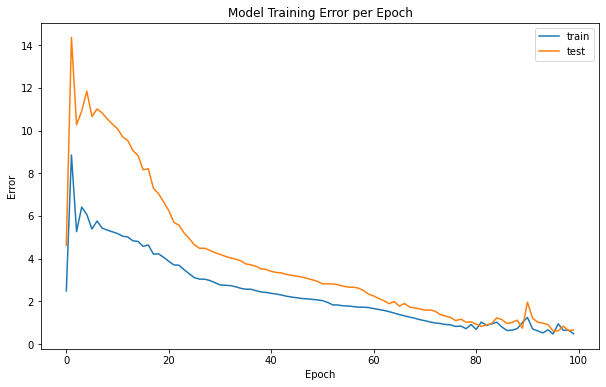

In [280]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Training Error per Epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('../plots/model_training_error_epochs.png', dpi=300)
plt.show()

## Model Accuracy

We can see below that the model is highly accurate on the test data with a root mean square error of 0.9. So this means that the the majority of the model's predicted values are within around -2 and +2 dollars of the actual closing values. 

In [210]:
y_hat = model.predict(X_test)
print(y_hat.shape)

(298, 1)


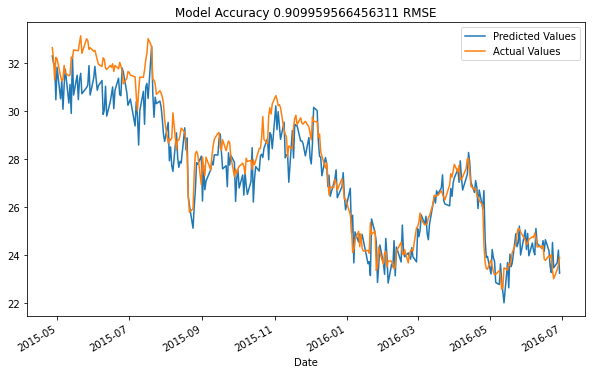

In [291]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_hat))
rmse

pd.DataFrame(
    {
        'Predicted Values': y_hat.reshape((y_hat.shape[0],)),
        'Actual Values': y_test.reshape((y_test.shape[0],))
    },
    index = data_df.iloc[(num_train_items+num_val_items):,:].index
).plot(figsize=(10,6), title=f'Model Accuracy {rmse} RMSE')
plt.savefig('../plots/model_accuracy.png', dpi=300)
plt.show()

## Univariate LSTM Model

The model above is fairly accurate but in order to see how much is due to the news, we will also train a model with only the previous closing values, also using a LSTM architecture. We use some of the code from [this tutorial](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/) to accomplish this.

### Format and split the data

We have to format the data such that we set the desired number of lags as predictors. So in the case where we select the number of lags to be 2, then each row of the training data would be T-1 and T-2, and the label for that row would be T. In the code below, we can see that the `lags` variable is set to 1 because that yielded better accuracy compared to lags of 2 and 3.

In [245]:
# split a univariate sequence
def split_sequence(sequence, lags):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + lags
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [248]:
lags = 1
X, y = split_sequence(stock_df['Close'].dropna().values, lags)
X = scaler.transform(X)

We split the data to match the proportions above.

In [249]:
print(X.shape)
print(y.shape)

(1987, 1)
(1987,)


In [251]:
X_train_uni = X[:num_train_items]
y_train_uni = y[:num_train_items]
print(X_train_uni.shape)
print(y_train_uni.shape)

(1391, 1)
(1391,)


In [252]:
X_val_uni = X[num_train_items:(num_train_items+num_val_items)]
y_val_uni = y[num_train_items:(num_train_items+num_val_items)]
print(X_val_uni.shape)
print(y_val_uni.shape)

(298, 1)
(298,)


In [253]:
X_test_uni = X[(num_train_items+num_val_items):]
y_test_uni = y[(num_train_items+num_val_items):]
print(X_test_uni.shape)
print(y_test_uni.shape)

(298, 1)
(298,)


In [254]:
X_train_uni = X_train_uni.reshape((X_train_uni.shape[0], X_train_uni.shape[1], 1))
X_val_uni = X_val_uni.reshape((X_val_uni.shape[0], X_val_uni.shape[1], 1))
X_test_uni = X_test_uni.reshape((X_test_uni.shape[0], X_test_uni.shape[1], 1))

### Train Univariate Model

We train the model using the hyperparameters listed below as they provided the best accuracy.

In [255]:
# define model
model_uni = Sequential()
model_uni.add(LSTM(400, input_shape=(lags, 1)))
model_uni.add(Dense(1))
model_uni.compile(optimizer='adam', loss='mae')
# fit model
history_uni = model_uni.fit(X_train_uni, y_train_uni, epochs=100, batch_size=72, validation_data=(X_val_uni, y_val_uni), verbose=2, shuffle=False)

Epoch 1/100
20/20 - 1s - loss: 12.4037 - val_loss: 25.4204
Epoch 2/100
20/20 - 0s - loss: 12.1544 - val_loss: 25.2510
Epoch 3/100
20/20 - 0s - loss: 11.7523 - val_loss: 24.9645
Epoch 4/100
20/20 - 0s - loss: 11.0996 - val_loss: 24.5265
Epoch 5/100
20/20 - 0s - loss: 10.1176 - val_loss: 23.9100
Epoch 6/100
20/20 - 0s - loss: 9.0976 - val_loss: 23.1932
Epoch 7/100
20/20 - 0s - loss: 8.3325 - val_loss: 22.4183
Epoch 8/100
20/20 - 0s - loss: 7.7745 - val_loss: 21.6420
Epoch 9/100
20/20 - 0s - loss: 7.4402 - val_loss: 20.9233
Epoch 10/100
20/20 - 0s - loss: 7.1532 - val_loss: 20.1993
Epoch 11/100
20/20 - 0s - loss: 6.8723 - val_loss: 19.4618
Epoch 12/100
20/20 - 0s - loss: 6.6369 - val_loss: 18.7468
Epoch 13/100
20/20 - 0s - loss: 6.4400 - val_loss: 18.0660
Epoch 14/100
20/20 - 0s - loss: 6.2337 - val_loss: 17.3858
Epoch 15/100
20/20 - 0s - loss: 6.0156 - val_loss: 16.6856
Epoch 16/100
20/20 - 0s - loss: 5.7882 - val_loss: 15.9559
Epoch 17/100
20/20 - 0s - loss: 5.5564 - val_loss: 15.1991
E

The model converges at around 35 epochs, so we could go from 100 to 40 epochs in order to reduce computation.

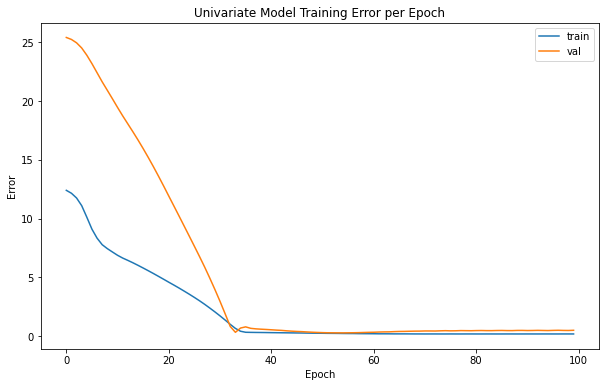

In [292]:
plt.figure(figsize=(10,6))
pyplot.plot(history_uni.history['loss'], label='train')
pyplot.plot(history_uni.history['val_loss'], label='val')
plt.title('Univariate Model Training Error per Epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('../plots/univariate_model_training_error_epochs.png', dpi=300)
pyplot.show()

### Univariate model accuracy

The univariate model is more accurate than the model that also takes news headlines as predictors. It has a RMSE of 0.7. This means that the majority of the model's predicted values are within around -1.4 and +1.4 dollars of the actual closing values.

In [257]:
y_hat_uni = model_uni.predict(X_test_uni)
print(y_hat_uni.shape)

(298, 1)


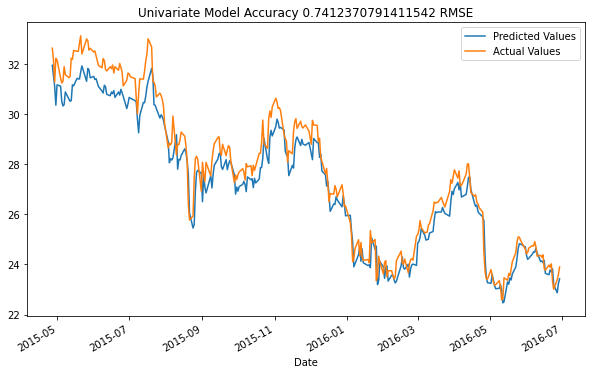

In [293]:
rmse_uni = sqrt(mean_squared_error(y_test_uni, y_hat_uni))
rmse_uni

pd.DataFrame(
    {
        'Predicted Values': y_hat_uni.reshape((y_hat.shape[0],)),
        'Actual Values': y_test.reshape((y_test.shape[0],))
    },
    index = data_df.iloc[(num_train_items+num_val_items):,:].index
).plot(figsize=(10,6), title=f'Univariate Model Accuracy {rmse_uni} RMSE')
plt.savefig('../plots/univariate_model_accuracy.png', dpi=300)
plt.show()

## Headlines-Only Model

Based on the two previous results, it seems that the headlines data provide noise that affects the accuracy of the model negatively. But in order confirm that, we will train a model that only takes the headlines as input and not previous closing prices.

In [297]:
model_no_prev = Sequential()
model_no_prev.add(LSTM(1000, input_shape=(X_train[:,:,:-1].shape[1], X_train[:,:,:-1].shape[2])))
model_no_prev.add(Dense(1))
model_no_prev.compile(loss='mae', optimizer='adam')

history_no_prev = model_no_prev.fit(X_train[:,:,:-1], y_train, epochs=100, batch_size=72, validation_data=(X_val[:,:,:-1], y_val), verbose=2, shuffle=False)

Epoch 1/100
20/20 - 4s - loss: 2.3778 - val_loss: 5.9805
Epoch 2/100
20/20 - 1s - loss: 8.0990 - val_loss: 14.2006
Epoch 3/100
20/20 - 1s - loss: 5.3513 - val_loss: 11.4627
Epoch 4/100
20/20 - 1s - loss: 5.9068 - val_loss: 11.2849
Epoch 5/100
20/20 - 1s - loss: 5.9516 - val_loss: 12.0395
Epoch 6/100
20/20 - 1s - loss: 5.5893 - val_loss: 11.9154
Epoch 7/100
20/20 - 1s - loss: 5.5885 - val_loss: 11.9473
Epoch 8/100
20/20 - 1s - loss: 5.5051 - val_loss: 11.9253
Epoch 9/100
20/20 - 1s - loss: 5.4408 - val_loss: 11.8427
Epoch 10/100
20/20 - 1s - loss: 5.3967 - val_loss: 11.7587
Epoch 11/100
20/20 - 1s - loss: 5.3478 - val_loss: 11.6483
Epoch 12/100
20/20 - 1s - loss: 5.3408 - val_loss: 11.6601
Epoch 13/100
20/20 - 1s - loss: 5.2619 - val_loss: 11.5342
Epoch 14/100
20/20 - 1s - loss: 5.2358 - val_loss: 11.4247
Epoch 15/100
20/20 - 1s - loss: 5.2092 - val_loss: 11.3486
Epoch 16/100
20/20 - 1s - loss: 5.1710 - val_loss: 11.2663
Epoch 17/100
20/20 - 1s - loss: 5.1205 - val_loss: 11.1291
Epoch 1

The model never converges, which means that model is overfitting on the training data and not able to extrapolate to the validation data. This happened even after trying a few different output dimensions for the LSTM layer.

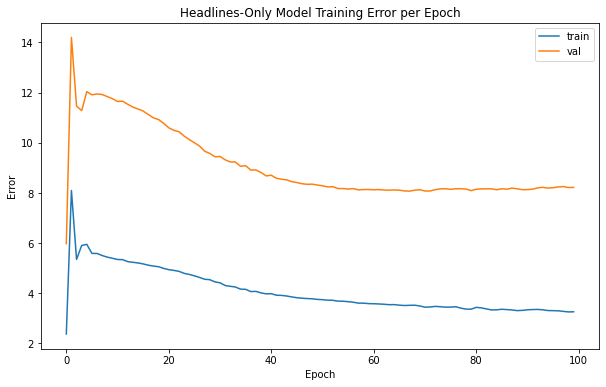

In [298]:
plt.figure(figsize=(10,6))
pyplot.plot(history_no_prev.history['loss'], label='train')
pyplot.plot(history_no_prev.history['val_loss'], label='val')
plt.title('Headlines-Only Model Training Error per Epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('../plots/headlines_only_model_training_error_epochs.png', dpi=300)
pyplot.show()


In [227]:
y_hat_no_prev = model.predict(X_test[:,:,:-1])
print(y_hat_no_prev.shape)

(298, 1)


### Headlines-Only Model Accuracy

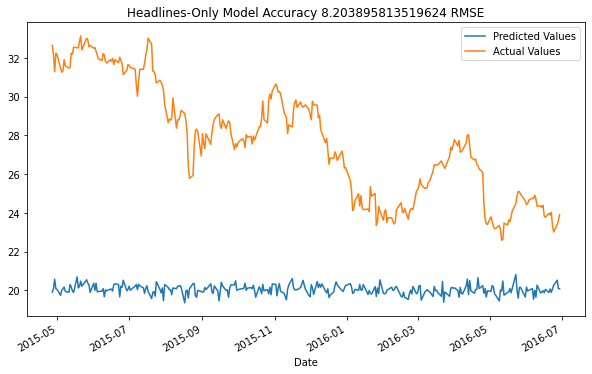

In [300]:
rmse_no_prev = sqrt(mean_squared_error(y_test, y_hat_no_prev))
rmse_no_prev

pd.DataFrame(
    {
        'Predicted Values': y_hat_no_prev.reshape((y_hat_no_prev.shape[0],)),
        'Actual Values': y_test.reshape((y_test.shape[0],))
    },
    index = data_df.iloc[(num_train_items+num_val_items):,:].index
).plot(figsize=(10,6), title=f'Headlines-Only Model Accuracy {rmse_no_prev} RMSE')
plt.savefig('../plots/headlines_only_model_accuracy.png', dpi=300)
plt.show()


## Conclusion

I think it's a well known phenomenon that certain external factors like the Fed announcing a change in its funds rate, or the news of a government enacting tariffs for certain products, or an oil spill, or many other things. And this external factors can be captured by the headlines of any given day. So this project set out to trying to capture the information from headlines and use it to make predictions on the Apple stock, which was specifically chosen because it's often in the news.

But after training three different models, one that took headlines and previous closing values as input, one that took only the previous closing values, and one that only took the headlines, the performance of the models indicate that the news data provides noise that makes a model overfit and increase its error on the test data.

Although we initially saw that the model trained on healines and previous values had good accuracy (0.9 RMSE), we then saw that the model trained only on previous data had better accuracy (0.74), and then we finally saw that the model that was trained only on headlines never converged and had abismal accuracy (8.2).

There are a few reasons why the headlines data may not provide good information. It can be that the reprentation that we created with BERT does not capture the information necessary to make predictions. Maybe by using the entire output from the BERT model (instead of the just the means) and then using a dimensionality reduction algorithm like PCA or t-SNE can provide a better representation.

Or maybe selecting headlines from specific sources like CNBC or the Wall Stree Journal can improve the quality of the headlines. Or maybe the assumption that the news can provide information to helps predict stock values is wrong.

## References

1. https://www.kaggle.com/aaron7sun/stocknews
2. https://arxiv.org/abs/1810.04805
3. https://towardsdatascience.com/understanding-latent-space-in-machine-learning-de5a7c687d8d
4. https://ieeexplore.ieee.org/document/8944624
5. https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
6. https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
7. https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
8. https://huggingface.co/